In [621]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [622]:
df = pd.read_csv("https://raw.githubusercontent.com/delinai/schulich_ds1/main/Datasets/kc_house_data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [623]:
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [624]:
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from statsmodels.formula.api import ols

Data cleaning.   Convert date to datetime type.   Then extract year.

In [625]:
df['date'] = pd.to_datetime(df['date']) 
df['year'] = df['date'].dt.year 

Check if there is any null value

In [626]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
year             0
dtype: int64

In [627]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,2014
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,2015
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,2014
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,2015


Replace the sqft_basement with 0 and 1. 0 means no basement. 1 means yes.    
Replace the yr_built with 0 and 1.  0 means no renovation. 1 means yes.

In [628]:
df['basement'] = df['sqft_basement'].apply(lambda x: 1 if x > 0 else 0)
df['renovation'] = df['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
df['house_age'] = df['year'] - df['yr_built']
#df = df.drop(['sqft_above', 'year', 'sqft_living15', 'sqft_lot15', 'yr_renovated', 'sqft_basement', 'yr_built'], axis=1)



In [672]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21612 non-null  float64
 1   bedrooms       21612 non-null  int64  
 2   bathrooms      21612 non-null  float64
 3   sqft_living    21612 non-null  int64  
 4   sqft_lot       21612 non-null  int64  
 5   floors         21612 non-null  float64
 6   waterfront     21612 non-null  int64  
 7   view           21612 non-null  int64  
 8   condition      21612 non-null  int64  
 9   grade          21612 non-null  int64  
 10  sqft_above     21612 non-null  int64  
 11  sqft_basement  21612 non-null  int64  
 12  lat            21612 non-null  float64
 13  long           21612 non-null  float64
 14  sqft_living15  21612 non-null  int64  
 15  sqft_lot15     21612 non-null  int64  
 16  basement       21612 non-null  int64  
 17  renovation     21612 non-null  int64  
 18  house_age  

In [630]:
df = df.drop(['id','date', 'year', 'yr_built', 'yr_renovated'], axis=1)

In [631]:
df['zipcode'].unique()

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039], dtype=int64)

In [632]:
df.groupby('zipcode')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
zipcode,,,,,
98001,260000.0,3.0,2.000,1822.0,9287.0
98002,235000.0,3.0,1.750,1570.0,7282.0
98003,267475.0,3.0,2.000,1780.0,8816.0
98004,1150000.0,4.0,2.500,2660.0,11119.0
98005,765475.0,4.0,2.375,2505.0,12220.0
...,...,...,...,...,...
98177,554000.0,3.0,2.000,2120.0,8210.0
98178,278277.0,3.0,1.750,1725.0,7200.0
98188,264000.0,3.0,1.750,1690.0,8913.0


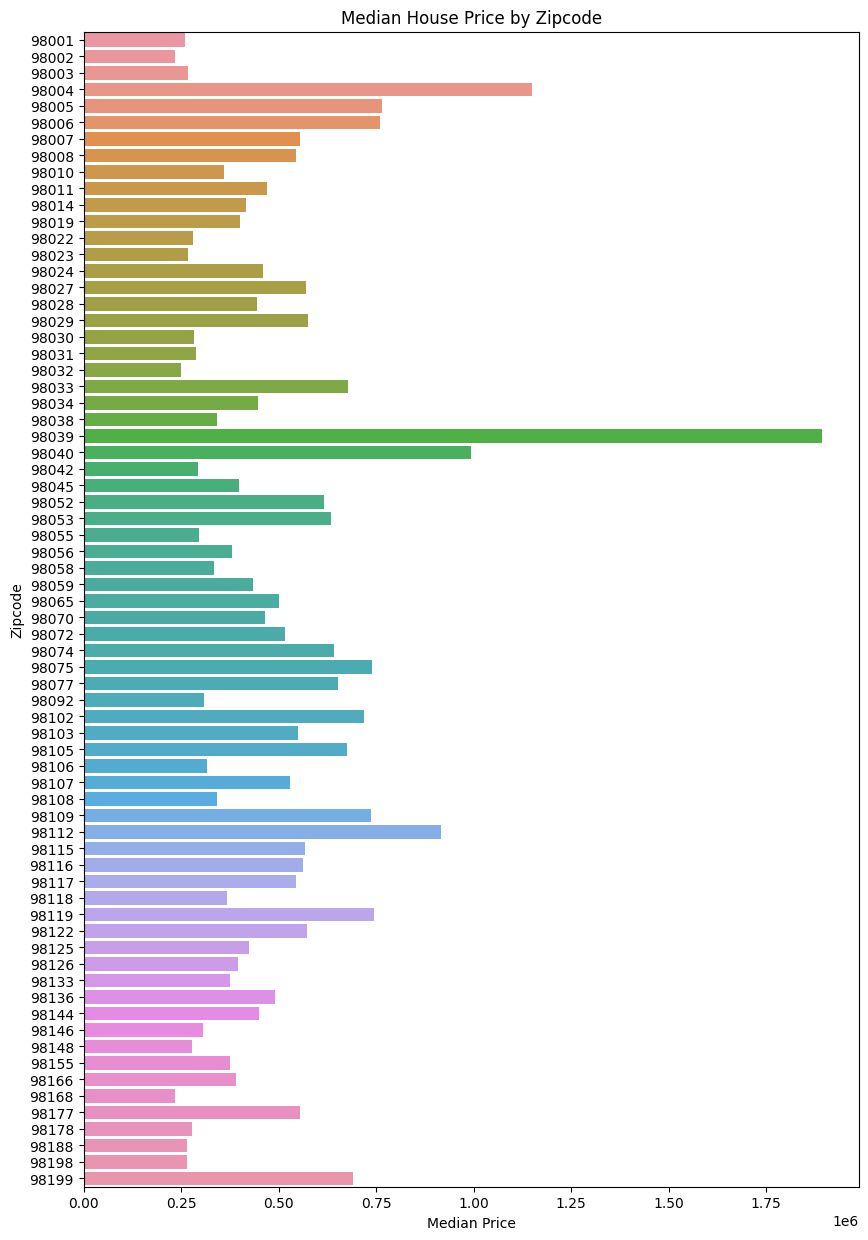

In [633]:
median_price_per_zipcode = df.groupby('zipcode')['price'].median()
median_price_df = median_price_per_zipcode.reset_index()

# Sort the DataFrame by price to make the plot more readable
median_price_df = median_price_df.sort_values('price')

# Create a bar plot
plt.figure(figsize=(10, 15))  # Increase figure size for better visibility
sns.barplot(y='zipcode', x='price', data=median_price_df, orient='h')

plt.title('Median House Price by Zipcode')
plt.xlabel('Median Price')
plt.ylabel('Zipcode')
plt.show()

In [634]:
df = df.drop(['zipcode' ], axis=1)

By grouping by some cat columns and comparing the price difference.   
It can be seen that waterfront, view, condition, grade, basement, renovation have a noticeable influence on housing price.

In [635]:
df.groupby('waterfront')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
waterfront,,,,,
0,450000.0,3.0,2.25,1910.0,7588.5
1,1400000.0,3.0,2.50,2850.0,17342.0


In [636]:
df.groupby('view')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
view,,,,,
0,432500.0,3.0,2.25,1850.0,7500.0
1,690944.0,4.0,2.25,2420.0,8734.5
2,675000.0,3.0,2.50,2470.0,8505.0
3,802500.0,4.0,2.50,2840.0,9628.5
4,1185000.0,4.0,2.50,3050.0,13122.0


In [637]:
df.groupby('condition')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
condition,,,,,
1,262500.0,2.0,1.00,1000.0,9300.0
2,279000.0,3.0,1.00,1320.0,8380.0
3,450000.0,3.0,2.50,1970.0,7220.0
4,440000.0,3.0,1.75,1820.0,8530.0
5,526000.0,3.0,2.00,1880.0,7410.0


In [638]:
df.groupby('grade')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
grade,,,,,
1,142000.0,0.0,0.000,290.0,20875.0
3,262000.0,1.0,0.000,600.0,24501.0
4,205000.0,2.0,1.000,660.0,8636.0
5,228700.0,2.0,1.000,905.0,7175.0
6,275276.5,3.0,1.000,1120.0,7196.0
7,375000.0,3.0,1.750,1630.0,7410.0
8,510000.0,3.0,2.500,2150.0,7267.0
9,720000.0,4.0,2.500,2820.0,8160.0
10,914327.0,4.0,2.750,3450.0,11245.0


In [639]:
df.groupby('basement')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
basement,,,,,
0,411500.0,3.0,2.00,1740.0,7651.0
1,515000.0,3.0,2.25,2100.0,7540.0


In [640]:
df.groupby('renovation')[['price','bedrooms','bathrooms','sqft_living','sqft_lot']].median()

,price,bedrooms,bathrooms,sqft_living,sqft_lot
renovation,,,,,
0,448000.0,3.0,2.25,1900.0,7620.0
1,600000.0,3.0,2.25,2200.0,7500.0


Check model with original 4 cat columns

In [641]:
results_1 = ols("price ~ waterfront + view + condition + grade", data=df).fit()
print(results_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.531
Model:                            OLS   Adj. R-squared:                  0.531
Method:                 Least Squares   F-statistic:                     6128.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:50:36   Log-Likelihood:            -2.9941e+05
No. Observations:               21613   AIC:                         5.988e+05
Df Residuals:                   21608   BIC:                         5.989e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.211e+06   1.59e+04    -76.305      0.0

Check model with with more cat columns such as basement, renovation.  
Get higher R-squared.  

Find outliers

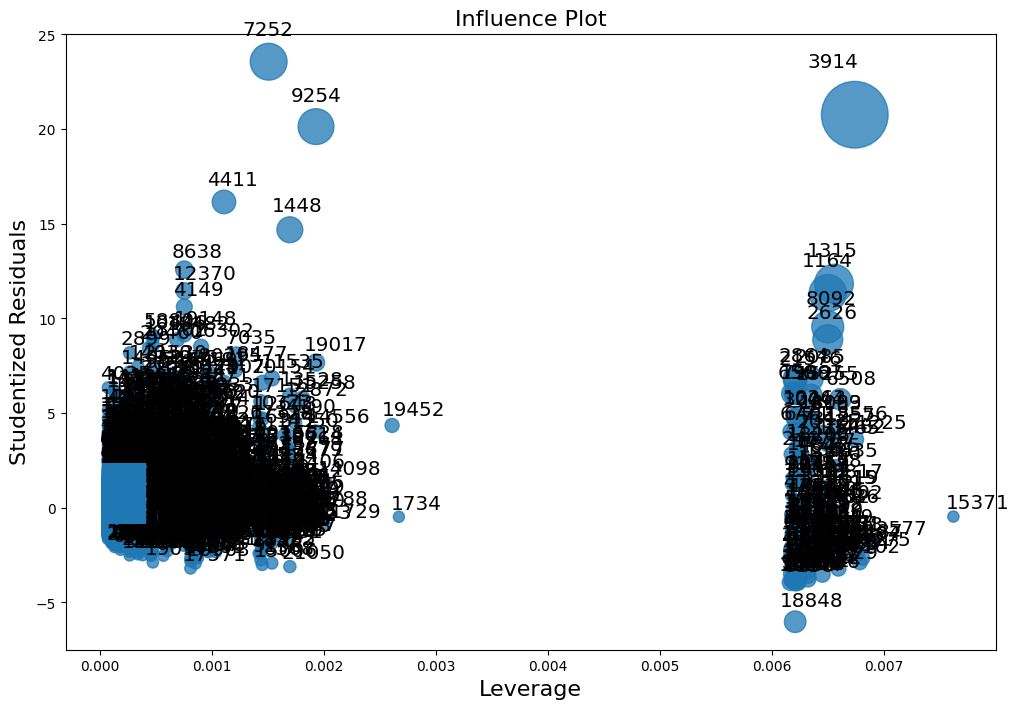

In [642]:
import statsmodels.api as sm
fig, ax = plt.subplots(figsize=(12,8))
fig = sm.graphics.influence_plot(results_1, ax=ax, criterion='cooks')

Find more outliers with 散点图

In [643]:
df = df.drop([3914])

In [644]:
results_2 = ols("price ~ waterfront + view + condition + grade + basement + renovation", data=df).fit()
print(results_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.551
Method:                 Least Squares   F-statistic:                     4417.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:52:53   Log-Likelihood:            -2.9878e+05
No. Observations:               21612   AIC:                         5.976e+05
Df Residuals:                   21605   BIC:                         5.976e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.226e+06   1.55e+04    -79.220      0.0

Check model with num columns

In [645]:
results_3 = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + house_age", data=df).fit()
print(results_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     4497.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:52:53   Log-Likelihood:            -2.9867e+05
No. Observations:               21612   AIC:                         5.974e+05
Df Residuals:                   21605   BIC:                         5.974e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -2.238e+05   9621.221    -23.265      

Combine all cat and num columns in the model.  
Get 65.6% R-squared. A good number.  

In [646]:
results_4 = ols("price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + house_age + waterfront + view + condition + grade + basement + renovation", data=df).fit()
print(results_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.653
Model:                            OLS   Adj. R-squared:                  0.653
Method:                 Least Squares   F-statistic:                     3386.
Date:                Tue, 11 Jul 2023   Prob (F-statistic):               0.00
Time:                        08:52:53   Log-Likelihood:            -2.9600e+05
No. Observations:               21612   AIC:                         5.920e+05
Df Residuals:                   21599   BIC:                         5.921e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    -1.01e+06   1.71e+04    -58.920      

In [647]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso

In [648]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21612 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21612 non-null  float64
 1   bedrooms       21612 non-null  int64  
 2   bathrooms      21612 non-null  float64
 3   sqft_living    21612 non-null  int64  
 4   sqft_lot       21612 non-null  int64  
 5   floors         21612 non-null  float64
 6   waterfront     21612 non-null  int64  
 7   view           21612 non-null  int64  
 8   condition      21612 non-null  int64  
 9   grade          21612 non-null  int64  
 10  sqft_above     21612 non-null  int64  
 11  sqft_basement  21612 non-null  int64  
 12  lat            21612 non-null  float64
 13  long           21612 non-null  float64
 14  sqft_living15  21612 non-null  int64  
 15  sqft_lot15     21612 non-null  int64  
 16  basement       21612 non-null  int64  
 17  renovation     21612 non-null  int64  
 18  house_age  

In [649]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# Perform PCA
pca = PCA()
df_pca = pca.fit_transform(df_std)

# The transformed data is an array, convert it back into a dataframe
# replace columns name with pc1,2,3,4...
df_pca = pd.DataFrame(df_pca, columns=[f'PC{i+1}' for i in range(len(df.columns))])

# Print the explained variance ratio
print('Explained variance ratio:', pca.explained_variance_ratio_)

# Print the cumulative explained variance ratio
cumsum_variance = np.cumsum(pca.explained_variance_ratio_)
print('Cumulative explained variance ratio:', cumsum_variance)

# Show the first few rows of transformed dataframe
df_pca

Explained variance ratio: [2.94491760e-01 1.42237730e-01 9.50433593e-02 7.59123740e-02
 5.95203283e-02 5.50982098e-02 5.26194483e-02 4.09704908e-02
 3.47924600e-02 3.30496310e-02 2.70318738e-02 1.79251795e-02
 1.59900040e-02 1.41948396e-02 1.28765104e-02 1.06242915e-02
 9.83020544e-03 7.79130367e-03 1.98637922e-31]
Cumulative explained variance ratio: [0.29449176 0.43672949 0.53177285 0.60768522 0.66720555 0.72230376
 0.77492321 0.8158937  0.85068616 0.88373579 0.91076767 0.92869285
 0.94468285 0.95887769 0.9717542  0.98237849 0.9922087  1.
 1.        ]


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19
0,-2.595917,-0.708416,0.016156,0.314953,-0.140203,0.024808,0.060944,-0.259146,-0.319509,0.950240,-0.165292,0.161700,0.173121,0.029663,0.385010,0.277811,-0.147537,0.188345,1.741261e-13
1,0.103399,1.406241,-0.779734,1.435286,1.913583,2.398798,3.347802,-0.187080,0.485173,-1.326704,-0.007134,-0.139458,-0.481853,0.112044,-0.502297,0.728334,0.141919,-0.943390,4.283144e-14
2,-2.932593,-0.331277,0.159414,0.914868,1.078496,0.138242,-0.849003,-1.425905,-0.546758,0.766033,-0.008992,-0.179701,-1.119563,0.577441,-1.087997,-0.606785,0.305357,0.420478,-1.138381e-13
3,-0.777264,2.637068,-0.040225,-1.493250,-0.398932,-1.069618,0.174082,1.327698,0.738020,-1.063505,-0.161905,0.818937,0.557731,-0.423824,-0.344018,-0.453873,0.133588,0.126524,1.809241e-13
4,-0.437403,-1.227878,-0.039119,0.026276,0.118097,0.059122,-0.416130,-1.443364,0.069556,0.163878,-0.021574,0.545254,0.647559,-0.221621,0.237970,-0.082627,-0.309822,0.158060,-6.852984e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21607,0.048910,-1.813103,-1.928140,0.599546,0.471908,1.203166,-0.812208,1.690604,0.744042,-0.911043,0.617984,-0.042275,-0.456762,0.283796,0.064042,0.115073,0.155992,0.507526,-1.247543e-16
21608,0.775763,-1.498864,-1.102046,-0.116977,-0.367376,0.344445,0.164911,1.383559,0.179537,0.440841,-0.068663,0.795568,-0.021836,-0.033026,-0.067455,0.372546,0.260823,-0.062897,-1.222395e-17
21609,-2.374046,-1.597963,-0.912112,0.802509,-0.080589,1.048098,-0.983532,0.454895,-0.113611,-0.643633,0.035332,0.151634,0.058063,0.173230,0.901465,0.811599,0.972568,0.031918,2.506673e-17
21610,-0.120870,-1.984026,-0.785646,-0.064153,-0.505179,0.527852,-0.198115,-0.178349,0.467829,-0.733714,0.374850,-0.081287,0.548196,-0.181229,0.338887,-0.092436,-0.282010,0.360002,1.695061e-17


In [650]:
# separate features and target
categorical_features = ['waterfront','view', 'condition', 'grade', 'basement', 'renovation']
#categorical_features = ['waterfront','view', 'condition', 'grade']
numerical_features = ['bedrooms','bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'house_age']

target = ['price']

In [651]:
# split data in train / test
X_train, X_test, y_train, y_test = train_test_split(df[categorical_features + numerical_features]
                                                    ,df[target],
                                                    test_size = 0.3, random_state=1234)


In [652]:
cat_transformer = Pipeline(steps = [('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps = [('scaler', StandardScaler())])

In [653]:
preprocessor = ColumnTransformer(transformers = [('cat',cat_transformer, categorical_features),
                                                 ('num', num_transformer, numerical_features)])

In [654]:
linear_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [655]:
linear_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'basement', 'renovation']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'house_age'])])),
                ('regressor', LinearRegression())])

In [656]:
pred = linear_regression.predict(X_test)
pred

array([[862624.],
       [632352.],
       [390912.],
       ...,
       [506080.],
       [455040.],
       [639424.]])

In [657]:
error = pred - y_test
print(error)

          price
12433  107624.0
7794    52352.0
13436  -90088.0
1821   -55500.0
12450  165194.0
...         ...
2596  -603144.0
21161   36490.0
20133  117580.0
11131   60090.0
16763 -189576.0

[6484 rows x 1 columns]


In [658]:
from sklearn.metrics import mean_squared_error

In [659]:
np.sqrt(mean_squared_error(pred,y_test))

206760.89303573154

In [660]:
ridge_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Ridge(alpha=3.0))
])

In [661]:
ridge_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'basement', 'renovation']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'house_age'])])),
                ('regressor', Ridge(alpha=3.0))])

In [662]:
pred_ridge = ridge_regression.predict(X_test)

In [663]:
np.sqrt(mean_squared_error(pred_ridge,y_test))

207098.55964971916

In [664]:
lasso_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', Lasso(alpha=1.0))
])

In [665]:
lasso_regression.fit(X_train, y_train)

C:\Users\lifen\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.851e+13, tolerance: 2.020e+11
  model = cd_fast.enet_coordinate_descent(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'basement', 'renovation']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'house_age'])])),
                ('regressor', Lasso())])

In [666]:
lasso_pred = lasso_regression.predict(X_test)

In [667]:
np.sqrt(mean_squared_error(lasso_pred, y_test))

206743.83739858502

In [668]:
elasticnet_regression = Pipeline(steps = [
    ('preprocessor', preprocessor),
    ('regressor', ElasticNet(alpha=1.0, l1_ratio=0.8))
])

In [669]:
elasticnet_regression.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['waterfront', 'view',
                                                   'condition', 'grade',
                                                   'basement', 'renovation']),
                                                 ('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bedrooms', 'bathrooms',
                                                   'sqft_living', 'sqft_lot',
                                                   'floors', 'house_age'])])),
                ('regressor', ElasticNet(l1_ratio=0.8))])

In [670]:
elasticnet_pred = elasticnet_regression.predict(X_test)

In [671]:
np.sqrt(mean_squared_error(elasticnet_pred, y_test))

239490.0745140259